In [68]:
#Q 1
import pandas as pd

data = pd.read_csv("Iris.csv")

In [69]:
#Q 2
print(data.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [70]:
#Q 3
print(data.shape)

(150, 6)


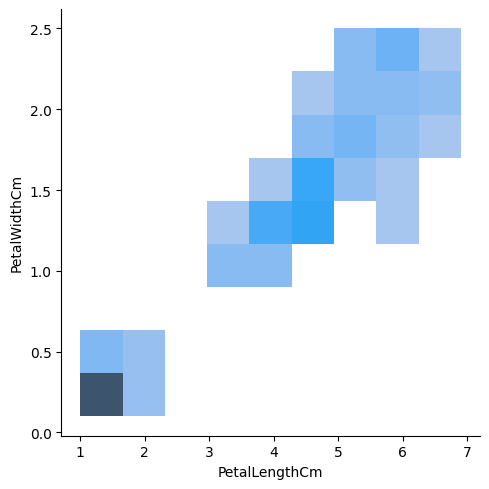

In [71]:
#Q 4
import seaborn as sns

sns.displot(data= data,x="PetalLengthCm",y="PetalWidthCm")

In [72]:
#Q 5
replace_values = {'Iris-setosa': '0', 'Iris-versicolor': '1', 'Iris-virginica':'2'}
data = data.replace({ 'Species' : replace_values})

In [73]:
#Q 6
print(data.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0
5   6            5.4           3.9            1.7           0.4       0
6   7            4.6           3.4            1.4           0.3       0
7   8            5.0           3.4            1.5           0.2       0
8   9            4.4           2.9            1.4           0.2       0
9  10            4.9           3.1            1.5           0.1       0


In [74]:
#Q 7
from sklearn.model_selection import train_test_split
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = data['Species']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)

In [75]:
#Q 8
print(Xtrain.head(10))
print(Xtest.head(10))
print(Ytrain.head(10))
print(Ytest.head(10))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
83             6.0           2.7            5.1           1.6
106            4.9           2.5            4.5           1.7
120            6.9           3.2            5.7           2.3
11             4.8           3.4            1.6           0.2
53             5.5           2.3            4.0           1.3
26             5.0           3.4            1.6           0.4
101            5.8           2.7            5.1           1.9
13             4.3           3.0            1.1           0.1
116            6.5           3.0            5.5           1.8
63             6.1           2.9            4.7           1.4
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
139            6.9           3.1            5.4           2.1
71             6.1           2.8            4.0           1.3
72             6.3           2.5            4.9           1.5
2              4.7           3.2            1.3           0.2
41      

In [76]:
#Q 9
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', max_iter=150, tol=0.07, verbose=True)
clf.fit(Xtrain, Ytrain)

MLPClassifier(max_iter=150, solver='lbfgs', tol=0.07, verbose=True)

In [77]:
#Q 10
import time
start = time.time()
Ypred = clf.predict(Xtest)
print("temps de reponse : %s" % (time.time() - start))
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, Ypred)

temps de reponse : 0.0029938220977783203


0.9777777777777777

In [78]:
#Q 11
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest, Ypred)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 11]], dtype=int64)

C:\Users\yosri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


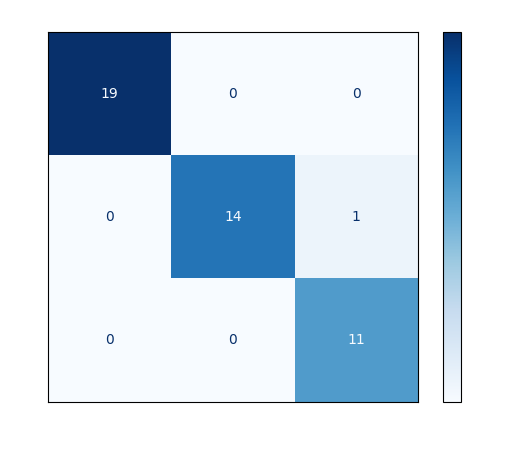

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

color = 'white'
matrix = plot_confusion_matrix(clf, Xtest, Ytest, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [80]:
#Q 15
clf2 = MLPClassifier(solver='lbfgs', max_iter=1500, tol=0.07, verbose=True)
clf2.fit(Xtrain, Ytrain)


MLPClassifier(max_iter=1500, solver='lbfgs', tol=0.07, verbose=True)

In [85]:
import time
start = time.time()
Ypred2 = clf2.predict(Xtest)
print("temps de reponse : %s" % (time.time() - start))
from sklearn.metrics import accuracy_score
accuracy_score(Ytest, Ypred2)

temps de reponse : 0.0019943714141845703


0.9777777777777777

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest, Ypred2)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 11]], dtype=int64)

C:\Users\yosri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


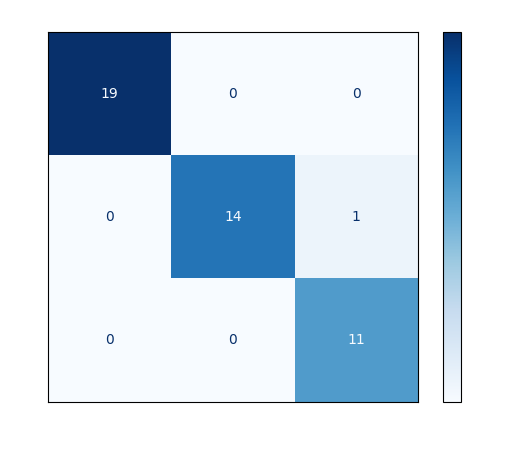

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

color = 'white'
matrix = plot_confusion_matrix(clf2, Xtest, Ytest, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()